# Midterm Exam - MLC Fall 2024

Total points for the midterm exam: 15. More detailed instructions are in the PDF file in Brightspace.

Please note: Copying and pasting other people's work is absolutely prohibited. Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

## Part A - Ensemble Methods (30% + 10% with optional extra)

### Task 1: Create and Visualize Decision Trees (extra 10%)

##### This task 1 (decision trees) is optional, and you can get an extra 10% if you decide to do this task.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

The provided **Telecom dataset** encompasses diverse parameters associated with telecom customers and aims to predict whether a customer is likely to stay (Contract Closure = 0) or leave (Contract Closure = 1) the telecom service provider. Each row represents a customer, and the columns include various features such state, total miutes of usage internet service, and more. The target variable, "Contract Closure," serves as the binary indicator for customer churn prediction, with 0 indicating the customer stays and 1 indicating the customer leaves the telecom service.

In [2]:
# Load the dataset

data = pd.read_csv("telecom_dataset.csv")
data=data.dropna()

In [3]:
data

,State_FIPS,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Contract Closure
0,1,118,510,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
1,1,98,408,0,161.0,117,27.37,190.9,113,16.23,227.7,113,10.25,12.1,4,3.27,4,0
2,1,91,510,0,129.9,112,22.08,173.3,83,14.73,247.2,130,11.12,11.2,3,3.02,3,0
3,1,106,415,0,223.0,121,37.91,110.1,98,9.36,188.7,107,8.49,7.1,12,1.92,0,0
4,1,73,415,0,192.2,86,32.67,168.6,116,14.33,139.8,87,6.29,9.4,6,2.54,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573,56,106,415,26,270.3,111,45.95,215.2,90,18.29,254.0,133,11.43,14.4,7,3.89,1,1
2574,56,97,510,0,236.9,107,40.27,157.6,105,13.40,241.0,120,10.85,7.3,2,1.97,0,1
2575,56,127,510,0,242.2,102,41.17,226.1,80,19.22,252.0,96,11.34,13.9,5,3.75,2,1
2576,56,159,415,0,167.4,68,28.46,143.8,74,12.22,140.1,111,6.30,10.3,3,2.78,0,1


In [4]:
# Split the dataset into features and target variable ("Contract Closure")


# Preparing the data
X = pd.get_dummies(data.drop('Contract Closure', axis=1))  # Convert categorical variables to dummy variables
y = data['Contract Closure']

In [5]:
X.head()

,State_FIPS,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,1,118,510,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
1,1,98,408,0,161.0,117,27.37,190.9,113,16.23,227.7,113,10.25,12.1,4,3.27,4
2,1,91,510,0,129.9,112,22.08,173.3,83,14.73,247.2,130,11.12,11.2,3,3.02,3
3,1,106,415,0,223.0,121,37.91,110.1,98,9.36,188.7,107,8.49,7.1,12,1.92,0
4,1,73,415,0,192.2,86,32.67,168.6,116,14.33,139.8,87,6.29,9.4,6,2.54,1


In [6]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Contract Closure, dtype: int64

In [7]:
# Split data into 80% train, 20% test, random_state=999
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)

In [8]:
# Print head

In [9]:
# Print the head of X_train
print("X_train head:")
print(X_train.head())

# Print the head of X_test
print("\nX_test head:")
print(X_test.head())

# Print the head of y_train
print("\nY_train head:")
print(y_train.head())

# Print the head of y_test
print("\nY_test head:")
print(y_test.head())

X_train head:
      State_FIPS  Account length  Area code  Number vmail messages  \
1193          27             173        510                      0   
2512          56              57        408                     39   
2383          51             138        415                      0   
1743          38              82        415                     29   
1396          32             130        510                      0   

      Total day minutes  Total day calls  Total day charge  Total eve minutes  \
1193              291.8              143             49.61              214.3   
2512              213.0              115             36.21              191.1   
2383              251.0              119             42.67               91.2   
1743              163.8               77             27.85              134.9   
1396              154.2              119             26.21              110.2   

      Total eve calls  Total eve charge  Total night minutes  \
1193          

In [10]:
X_train.head()

,State_FIPS,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
1193,27,173,510,0,291.8,143,49.61,214.3,134,18.22,151.2,119,6.80,9.9,2,2.67,0
2512,56,57,408,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0
2383,51,138,415,0,251.0,119,42.67,91.2,96,7.75,142.2,87,6.40,13.8,3,3.73,3
1743,38,82,415,29,163.8,77,27.85,134.9,112,11.47,79.3,95,3.57,8.8,2,2.38,2
1396,32,130,510,0,154.2,119,26.21,110.2,98,9.37,227.4,117,10.23,9.2,5,2.48,2


In [11]:
X_test.head()

,State_FIPS,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
618,16,114,408,19,154.6,100,26.28,241.6,109,20.54,160.0,112,7.20,12.6,1,3.40,3
1327,30,80,408,15,159.3,110,27.08,170.6,120,14.50,141.2,82,6.35,11.9,5,3.21,1
2104,46,103,510,0,206.5,125,35.11,180.2,113,15.32,220.6,95,9.93,12.2,4,3.29,3
2274,49,133,408,44,174.0,80,29.58,209.4,113,17.80,224.1,87,10.08,14.1,7,3.81,2
2483,55,63,510,34,152.2,119,25.87,227.1,91,19.30,195.7,103,8.81,12.3,5,3.32,1


In [12]:
y_train.head()

1193    1
2512    0
2383    0
1743    0
1396    0
Name: Contract Closure, dtype: int64

In [13]:
y_test.head()

618     0
1327    0
2104    0
2274    1
2483    0
Name: Contract Closure, dtype: int64

#### a. Evaluate the model. Report on in-sample (training data) and out-of-sample (test data).

In [14]:
# Build the decision tree model with max_depth = 2:

# Initialize the Decision Tree Classifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=999)

# Fit the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=999)

In [15]:
# Calculate in-sample accuracy
train_predictions = clf.predict(X_train)
in_sample_accuracy = accuracy_score(y_train, train_predictions)
print(f"In-sample accuracy: {in_sample_accuracy*100:.2f}%")

In-sample accuracy: 87.92%


In [16]:
# Calculate out-of-sample accuracy
test_predictions = clf.predict(X_test)
out_of_sample_accuracy = accuracy_score(y_test, test_predictions)
print(f"Out-of-sample accuracy: {out_of_sample_accuracy*100:.2f}%")

Out-of-sample accuracy: 86.63%


In [17]:
# Make predictions on the training set
train_predictions = clf.predict(X_train)
train_predictions

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [18]:
# Make predictions on the test set
test_predictions = clf.predict(X_test)
test_predictions

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

#### b. Visualize the decision tree.

In [19]:
# Visualize the decision tree

In [20]:
from sklearn import tree

In [21]:
print(tree.export_graphviz(clf,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=['Stay','Leave'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\","))

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Total day minutes <= 264.55, samples = 2062, value = [1757, 305], class = Stay", fillcolor="#ea975b"] ;
1 [label="Customer service calls <= 3.5, samples = 1941, value = [1710, 231], class = Stay", fillcolor="#e99254"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 1790, value = [1637, 153], class = Stay", fillcolor="#e78d4c"] ;
1 -> 2 ;
3 [label="samples = 151, value = [73, 78], class = Leave", fillcolor="#f2f9fd"] ;
1 -> 3 ;
4 [label="Number vmail messages <= 6.5, samples = 121, value = [47, 74], class = Leave", fillcolor="#b7dbf6"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 91, value = [20, 71], class = Leave", fillcolor="#71b9ec"] ;
4 -> 5 ;
6 [label="samples = 30, value = [27, 3], class = Stay", fillcolor="#e88f4f"] ;
4 -> 6 ;
}


In [22]:
# copy and paste the resulting output into http://www.webgraphviz.com

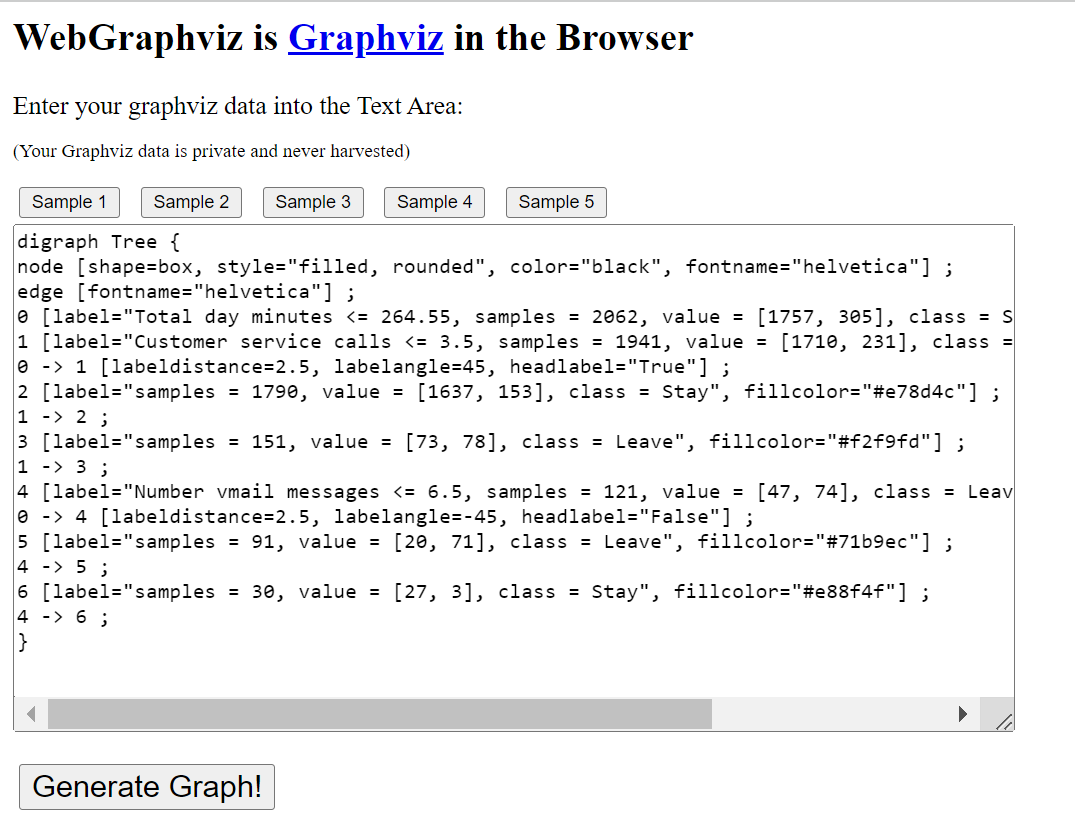

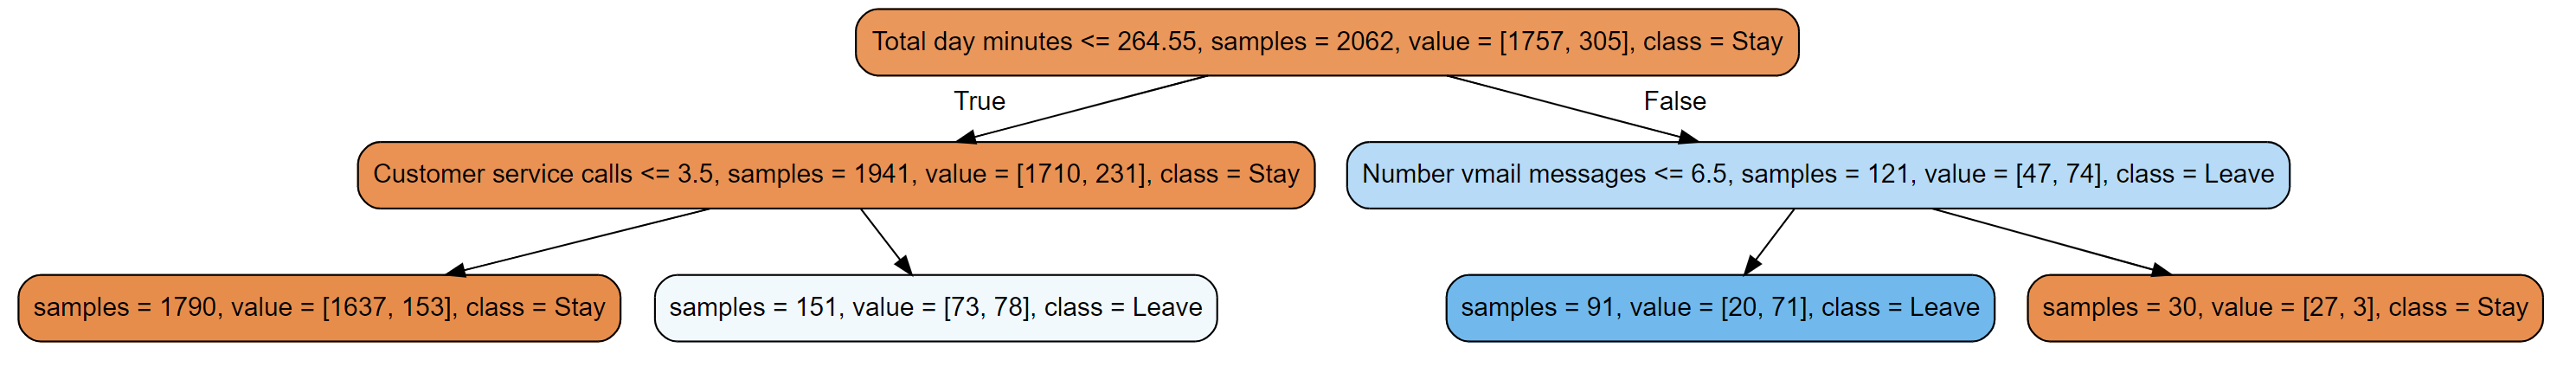

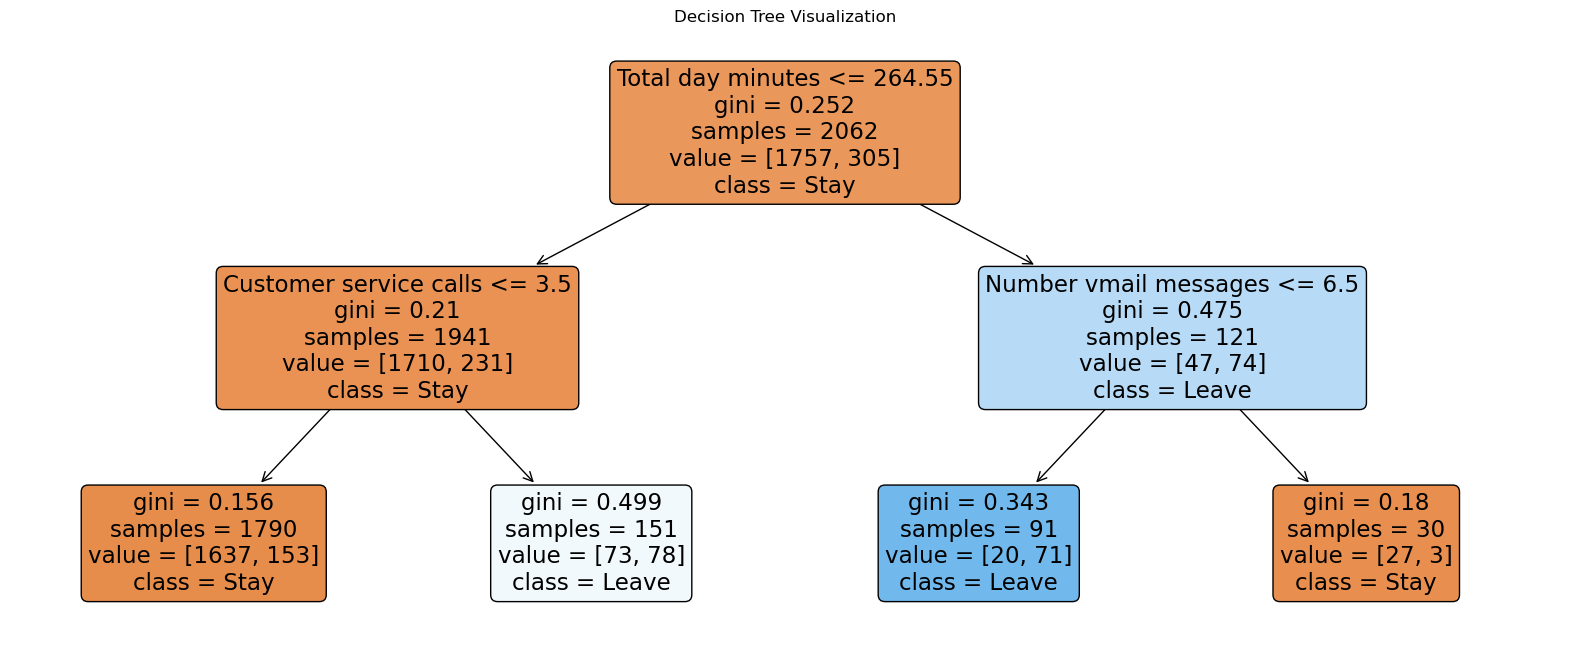

In [23]:
plt.figure(figsize=(20,8))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=['Stay', 'Leave'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

#### c. List the top 5 most important features in order.

In [24]:
# your code here

In [25]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)


# Print the top 5 most important features
print("Top 5 most important features in order:")
feature_importances.head(5)

Top 5 most important features in order:


,importance
Total day minutes,0.432110
Customer service calls,0.404648
Number vmail messages,0.163242
Total night minutes,0.000000
Total intl charge,0.000000


### Task 2: Ensemble Method Implementation (30%)

The goal of this task is to implement a **bagging and a boosting model** . Evaluate their performance on your dataset, providing insights into the differences in their error metrics, and discuss why one might outperform the other in this context.

In [26]:
# Suggested steps:
# 1) Split the data into training and testing sets, ensuring to respect the time series nature if applicable.
# 2) Implement a Bagging Regressor and a Gradient Boosting Regressor.
# 3) Evaluate both models using appropriate metrics for your problem.
# 4) Provide a comparative analysis of their performances.

The **AAPL, V, and GOOG datasets** consists of stock quotes companies, where the "Adj Close" price serves as the target variable, reflecting the adjusted closing price of Apple's stock over a specific period.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Below are several first steps of data processing. Make sure that you understand and follow those steps.

In [28]:
import pandas as pd
import os

file_names = ['AAPL.csv', 'V.csv', 'GOOG.csv']

# Function to load a CSV, transform the 'Dt' column, and set it as the index
def load_and_transform(file_path):
    df = pd.read_csv(file_path)
    df['Dt'] = pd.to_datetime(df['Dt'])
    df.set_index('Dt', inplace=True)
    return df

# Load all dataframes with the date transformations
dataframes = {name.split('.')[0]: load_and_transform(name) for name in file_names}

# Perform a series of left joins to combine the dataframes on their index
df = dataframes['AAPL']
for df_name in ['V', 'GOOG']:
    df = df.join(dataframes[df_name], how='left', lsuffix='_AAPL', rsuffix=f'_{df_name}')

df.head()

,Adj Close_AAPL,Close_AAPL,Div_AAPL,Factor_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Adj Close_V,Close_V,...,Open_V,Volume_V,Adj Close,Close,Div,Factor,High,Low,Open,Volume
Dt,,,,,,,,,,,,,,,,,,,,,
2017-01-03,110.9539,116.15,0.0,1.0,116.330,114.76,115.8000,28781900.0,78.0492,79.50,...,78.76,13785200.0,786.14,786.14,0.0,1.0,789.630,775.800,778.81,1657300.0
2017-01-04,110.8297,116.02,0.0,1.0,116.510,115.75,115.8500,21118100.0,78.6874,80.15,...,79.44,8033100.0,786.90,786.90,0.0,1.0,791.340,783.160,788.36,1073000.0
2017-01-05,111.3933,116.61,0.0,1.0,116.864,115.81,115.9200,22193600.0,79.6102,81.09,...,80.34,7805100.0,794.02,794.02,0.0,1.0,794.480,785.020,786.08,1335200.0
2017-01-06,112.6351,117.91,0.0,1.0,118.160,116.47,116.7789,31751900.0,80.7098,82.21,...,81.30,8898300.0,806.15,806.15,0.0,1.0,807.900,792.204,795.26,1640200.0
2017-01-09,113.6668,118.99,0.0,1.0,119.430,117.94,117.9500,33561900.0,80.2582,81.75,...,82.28,7305300.0,806.65,806.65,0.0,1.0,809.966,802.830,806.40,1274600.0


In [29]:
# Assuming 'df' is your DataFrame and 'Adj Close_AAPL' is the target variable
X = df.drop('Adj Close_AAPL', axis=1)
y = df['Adj Close_AAPL']

# fill NA
X = X.fillna(0)

# Data Splitting, considering its temporal nature
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#### a. Train and test Bagging Model.

In [30]:
# your code here

In [31]:
# Initialize Bagging Regressor
bagging_regressor = BaggingRegressor(n_estimators=10, random_state=999)

# Train the model
bagging_regressor.fit(X_train, y_train)

# Predict on training and testing set
y_pred_train_bagging = bagging_regressor.predict(X_train)
y_pred_test_bagging = bagging_regressor.predict(X_test)

#### b. Train and test Boosting Model.

In [32]:
# your code here

In [33]:
# Initialize Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=999)

# Train the model
gb_regressor.fit(X_train, y_train)

# Predict on training and testing set
y_pred_train_gb = gb_regressor.predict(X_train)
y_pred_test_gb = gb_regressor.predict(X_test)

#### c. Evaluate the model and report (use Mean squared error; Mean absolute error; and R2).  

In [34]:
# Model Evaluation using more metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluation Metrics for Bagging Regressor
mse_bagging = mean_squared_error(y_test, y_pred_test_bagging)
mae_bagging = mean_absolute_error(y_test, y_pred_test_bagging)
r2_bagging = r2_score(y_test, y_pred_test_bagging)

# Evaluation Metrics for Gradient Boosting Regressor
mse_gb = mean_squared_error(y_test, y_pred_test_gb)
mae_gb = mean_absolute_error(y_test, y_pred_test_gb)
r2_gb = r2_score(y_test, y_pred_test_gb)

# Printing out the performance metrics
print("Bagging Regressor:")
print('Bagging mean square error:', mse_bagging)
print('mean absolute error:', mae_bagging)
print('R square:', r2_bagging)

# This prints an empty line for visual separation
print()

print("Gradient Boosting Regressor:")
print('Boosting mean square error:', mse_gb)
print('mean absolute error:', mae_gb) 
print('R square:', r2_gb) 
print( )

# Printing out the performance metrics with explanations

# your code here

Bagging Regressor:
Bagging mean square error: 31.201233875467093
mean absolute error: 3.4115734745762736
R square: 0.8993782855393618

Gradient Boosting Regressor:
Boosting mean square error: 26.939372620053213
mean absolute error: 3.0907039556507234
R square: 0.9131224787345642



In [35]:
# Print Evaluation Results
print("Bagging Regressor:")
print(f"MSE: {mse_bagging:.4f}, MAE: {mae_bagging:.4f}, R²: {r2_bagging:.4f}\n")

print("Gradient Boosting Regressor:")
print(f"MSE: {mse_gb:.4f}, MAE: {mae_gb:.4f}, R²: {r2_gb:.4f}")

Bagging Regressor:
MSE: 31.2012, MAE: 3.4116, R²: 0.8994

Gradient Boosting Regressor:
MSE: 26.9394, MAE: 3.0907, R²: 0.9131


Comparative Analysis:


Error Metrics (MSE and MAE):
The Gradient Boosting Regressor has lower MSE and MAE values compared to the Bagging Regressor. Lower MSE and MAE indicate that the Gradient Boosting model's predictions are closer to the actual values, suggesting better overall performance in terms of accuracy.


R-Squared (R²):
The R² value is higher for the Gradient Boosting Regressor than for the Bagging Regressor. R² measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R² value (closer to 1) indicates a better fit of the model to the data. In this context, the Gradient Boosting model explains a larger proportion of the variance in the target variable, showing it might be more effective at capturing the underlying pattern in the dataset.

Why Gradient Boosting Might Outperform Bagging:

Model Complexity and Learning Method:

Gradient Boosting builds an ensemble of trees sequentially, where each new tree corrects errors made by previously trained trees. This method can lead to a more optimized model that adapts better to the dataset's complexities.
Bagging builds trees independently from bootstrap samples of the data and averages their predictions. While it effectively reduces variance and helps avoid overfitting, it might not capture complex patterns as effectively as Gradient Boosting.
Handling of Bias and Variance:

Gradient Boosting is designed to address both bias and variance by iteratively improving upon the residuals of previous models. This can result in a model that not only fits the training data well but also generalizes better to unseen data.
Bagging primarily focuses on reducing variance. If the base estimator (e.g., a decision tree) has a high bias, bagging might not improve the model performance significantly.

#### d. Hyperparameter Tuning and Model Optimization.  

In [36]:
# Possible steps:
# 1) Choose an ensemble model for hyperparameter tuning (one with the best performance in a previous step).
# 2) Define a parameter grid to explore.
# 3) Use GridSearchCV to find the optimal parameters.
# 4) Retrain the model using the best parameters and evaluate its performance.

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
# 1. Choose the model you wish to tune

gb_regressor = GradientBoostingRegressor(random_state=999)

# 2. Define a comprehensive grid of parameters to search

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# 3. Perform grid search and identify the best parameters

grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)


# 4. Get the best parameters from the grid search

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
print( )

# 5. Retrain the model with the best parameters and evaluate its performance

optimized_gb = GradientBoostingRegressor(**best_params, random_state=999)
optimized_gb.fit(X_train, y_train)

# Predictions
y_pred_train_opt = optimized_gb.predict(X_train)
y_pred_test_opt = optimized_gb.predict(X_test)

# Evaluate the model
mse_train_opt = mean_squared_error(y_train, y_pred_train_opt)
mse_test_opt = mean_squared_error(y_test, y_pred_test_opt)
mae_train_opt = mean_absolute_error(y_train, y_pred_train_opt)
mae_test_opt = mean_absolute_error(y_test, y_pred_test_opt)
r2_train_opt = r2_score(y_train, y_pred_train_opt)
r2_test_opt = r2_score(y_test, y_pred_test_opt)

# 6. Output the performance metrics

print("Optimized Gradient Boosting Regressor:")
print(f"Training MSE: {mse_train_opt}, Test MSE: {mse_test_opt}")
print(f"Training MAE: {mae_train_opt}, Test MAE: {mae_test_opt}")
print(f"Training R²: {r2_train_opt}, Test R²: {r2_test_opt}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}

Optimized Gradient Boosting Regressor:
Training MSE: 0.0047496935299215365, Test MSE: 27.321857905973364
Training MAE: 0.05437401217587219, Test MAE: 3.2100535576124805
Training R²: 0.9999930300729977, Test R²: 0.9118889914507323


#### e. Conceptual Questions
- Describe the trade-offs between bias and variance when using ensemble methods.
- How does increasing the diversity of models in an ensemble affect its performance?
- Discuss the implications of temporal dependencies in time series data on the choice and performance of ensemble methods.

In [39]:
# your answer to questions here

1. Trade-offs in Ensemble Methods:


Reducing Bias:

Some ensemble methods, particularly boosting methods like AdaBoost or Gradient Boosting, focus on sequentially reducing the bias of the combined model. They do this by paying more attention to training instances that previous models misclassified, thereby creating a sequence of models that increasingly focus on the hard-to-predict instances. While boosting methods can significantly reduce bias and improve model accuracy, they may increase the model's variance by making it overly complex and sensitive to the training data, potentially leading to overfitting.


Reducing Variance:

Other ensemble methods, such as bagging (Bootstrap Aggregating) and Random Forests, aim primarily to reduce variance. They create many models from different subsets of the training data (usually by sampling with replacement) and then average their predictions (for regression) or use majority voting (for classification). By aggregating the predictions of multiple models, the ensemble can smooth out individual models' peculiarities and errors, leading to a more stable and robust prediction. This approach is particularly effective when the base models are complex and prone to overfitting. However, if the base models are too simple, bagging might not significantly decrease bias.

2. Increasing the diversity of models in an ensemble can significantly affect its performance by:

Overfitting Reduction
Ensemble methods that promote model diversity tend to be less prone to overfitting. This is because overfitting usually results from a model being too closely tailored to the training data, capturing noise as if it were a signal. When diverse models are combined, the specific nuances or noise that an individual model might learn are less likely to be consistently represented across all models, making the final ensemble model more generalizable.

Diminishing Returns
While diversity generally improves ensemble performance, there's a point of diminishing returns. Beyond a certain level of diversity, the benefits of adding more diverse models may decrease. This can happen if the added models are too weak or if their predictions are so uncorrelated with the true outcome that they introduce more noise than signal when combined with the ensemble.

3. Implications of Temporal Dependencies in Time Series Data:

Model Choice: Time series data often exhibit trends, seasonality, and autocorrelation. Ensemble methods that can capture and leverage these temporal dependencies, either inherently or through feature engineering, are preferable. For instance, combining models that focus on different aspects of the data (trend vs. seasonal patterns) can be effective.

Data Splitting: The usual cross-validation techniques may not be appropriate for time series data due to temporal dependencies. Instead, methods like Time Series Split or walk-forward validation are used to respect the chronological order of observations. This impacts how ensemble models are trained and evaluated.

## Part B - Support Vector Machines (40%)

In [40]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

### Task 1: SVM Decision Boundaries and C Parameter Investigation (20%)

**The Iris dataset** is a classic in the field of machine learning and statistics, introduced by the British statistician and biologist Ronald Fisher in 1936. The dataset consists of 150 samples from three species of Iris flowers: Iris setosa, Iris versicolor, and Iris virginica. Each sample is described by four features: the length and the width of the sepals and petals, in centimeters. See [wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In [41]:
# Load the Iris dataset
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

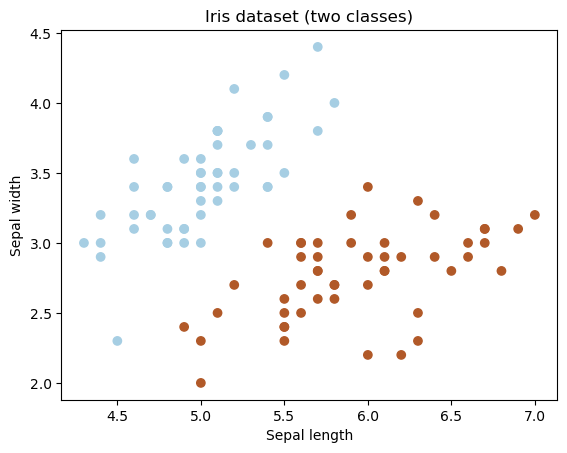

In [42]:
X = iris.data[:, :2]  # we only take the first two features for visualization
y = iris.target

# In the first task, we will consider only 2 classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset (two classes)')
plt.show()

#### a. Consider the dataset above. Based on the visual inspection of the plot provided, how would you train an SVM model for this dataset? Explain your choice of kernel and parameters.

In [43]:
# your answer here

1. Choice of Kernel:
The plot indicates that the two classes are roughly linearly separable, but there's some overlap between the classes. This suggests starting with a linear kernel because it is simpler and computationally less expensive. A linear kernel is often effective for linearly separable data, and even though there's some overlap, it might still provide a good balance between bias and variance.

2. Parameters:
The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. In this case, the plots clusters closely, so C paramater of large value is preferred.

**Assuming you chose to train a linear SVM with C=100000; answer the following five questions:**

#### b. Report the separating hyperplane.

In [44]:
# your answer here

In [45]:
from sklearn.svm import SVC

# Initialize the SVM model with a linear kernel and C=100000
clf = SVC(kernel='linear', C=100000)
clf.fit(X, y)

SVC(C=100000, kernel='linear')

In [46]:
from sklearn.svm import SVC

# Assuming X and y have been correctly defined and filtered for binary classification
clf = SVC(kernel='linear', C=100000)
clf.fit(X, y)

# After successful fitting
w = clf.coef_[0]
a = -w[0] / w[1]
b = clf.intercept_[0] / w[1]

# Print the equation of the separating hyperplane
print(f'The separating hyperplane is the line: y = {a}x - {b}')

The separating hyperplane is the line: y = 1.2000004017679664x - 3.2900023254701303


#### c. List the support vectors.

In [47]:
# your answer here

In [48]:
support_vectors = clf.support_vectors_

print("The support vectors are:")
print(support_vectors)

The support vectors are:
[[5.5 3.5]
 [4.5 2.3]
 [4.9 2.4]
 [5.4 3. ]]


#### d. Calculate the upper and lower hyperplanes (lines) of the margin

In [49]:
# your answer here

In [50]:
b = clf.support_vectors_[0]
print('The lower separating hyperplane of the margin is the line: y = {a}x - {b}'.format(a = a, b = abs(b[1] - a * b[0])))
b = clf.support_vectors_[-1]
print('The upper separating hyperplane of the margin is the line: y = {a}x + {b}'.format(a = a, b = (b[1] - a * b[0])))

The lower separating hyperplane of the margin is the line: y = 1.2000004017679664x - 3.100002209723815
The upper separating hyperplane of the margin is the line: y = 1.2000004017679664x + -3.480002169547019


#### e. Compute the width of the margin

In [51]:
# your answer here

In [52]:
margin_width = 2 / np.linalg.norm(w)

print(f'The width of the margin is: {margin_width}')

The width of the margin is: 0.24319362349362694


#### f. Using the provided SVM model with a high value of C (e.g., C=100000), plot the decision boundaries and margins. Then, adjust the SVM model by setting a very small value for the constant C (e.g., C=0.01). How do you expect this change to affect the margin width? Plot the new decision boundaries and margins and compare them to the previous plot to validate your expectations. Interpret the results

In [53]:
# Suggested steps:
# 1) Train a linear SVM with a large C value (optional if you already did)
# 2) Plot the decision boundaries and margins
# 3) Now train another linear SVM with a small C value
# 4) Plot the new decision boundaries and margins

In [54]:
# Train a linear SVM with a large C value (optional since we already did)

clf = SVC(kernel='linear',C=100000)  
clf.fit(X, y)

SVC(C=100000, kernel='linear')

In [55]:
# your plot here
def plot_decision_boundary(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)

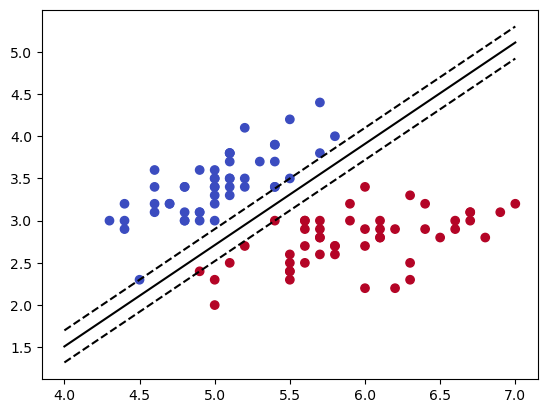

In [56]:
w = clf.coef_[0]
a = -w[0] / w[1]

x1 = np.linspace(4, 7)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])

b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap('coolwarm', 2))

plt.axis('tight')
plt.show()

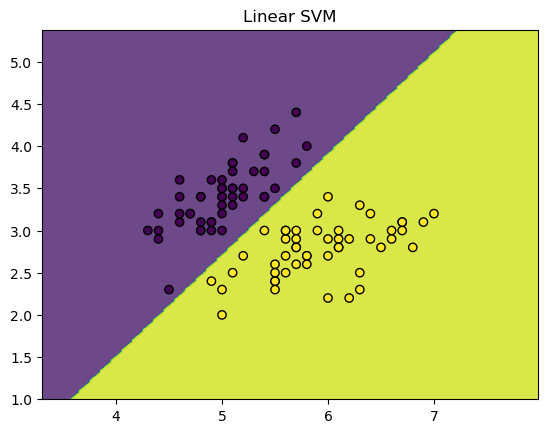

In [57]:

plot_decision_boundary(clf, X, y, "Linear SVM")

In [58]:
# Now train another linear SVM with a small C value

clf = SVC(kernel='linear',C=0.01)  
clf.fit(X, y)

SVC(C=0.01, kernel='linear')

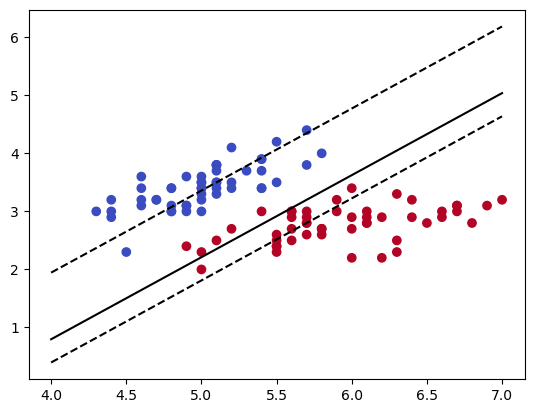

In [59]:
# your plot here

w = clf.coef_[0]
a = -w[0] / w[1]

x1 = np.linspace(4, 7)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])

b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.axis('tight')
plt.show()

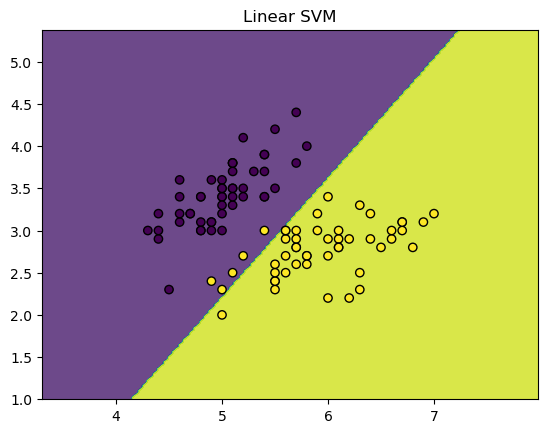

In [60]:
plot_decision_boundary(clf, X, y, "Linear SVM")

### Task 2: Training using SVM (20%)

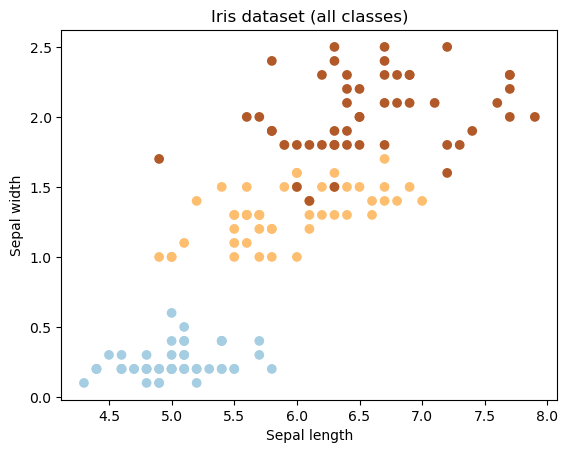

In [61]:
# Load Iris dataset
iris = load_iris(as_frame=True)
df = iris.frame
X = df[['sepal length (cm)','petal width (cm)']].values  # Select the first two features for visualization purposes
y = df.target

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset (all classes)')
plt.show()

#### a. Train a linear SVM and a non-linear SVM with RBF kernel using the training set. Use the default arguments, make predictions and calculate accuracy on test set.

In [62]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [63]:
# Standardize the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
# Train a linear SVM

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

SVC(kernel='linear')

In [65]:
# Train a non-linear SVM with RBF kernel

rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

SVC()

In [66]:
# Make predictions and calculate accuracy on test out-of-sample set

# Linear SVM predictions
y_pred_linear = linear_svc.predict(X_test)

# Non-linear SVM with RBF kernel predictions
y_pred_rbf = rbf_svc.predict(X_test)

print("Linear SVM Test Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Non-linear SVM (RBF) Test Accuracy:", accuracy_score(y_test, y_pred_rbf))

Linear SVM Test Accuracy: 0.94
Non-linear SVM (RBF) Test Accuracy: 0.96


In [67]:
# Plot decision boundaries (example code below)

def plot_decision_boundary(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)

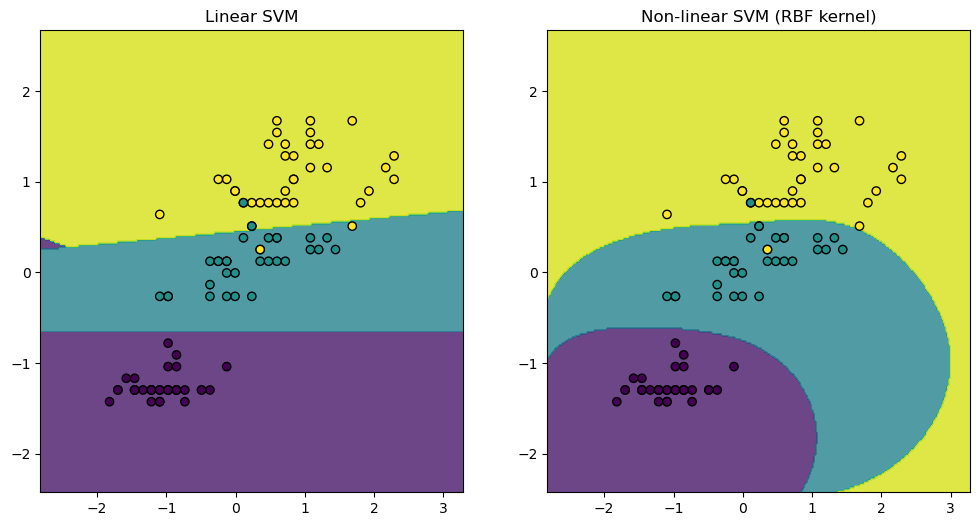

In [68]:
# Plot decision boundaries (example code below)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(linear_svc, X_train, y_train, "Linear SVM")
plt.subplot(1, 2, 2)
plot_decision_boundary(rbf_svc, X_train, y_train, "Non-linear SVM (RBF kernel)")
plt.show()

#### b. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [71]:
# Train your model.

poly_svc = SVC(kernel='poly')
poly_svc.fit(X_train,y_train)

# Predictions on the training set
y_pred_train = poly_svc.predict(X_train)

# Predictions on the test set
y_pred_test = poly_svc.predict(X_test)


# Report IS and OS results.

# Calculate accuracy on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print the accuracies
print(f"Polynomial SVM Training Set Accuracy: {accuracy_train}")
print(f"Polynomial SVM Test Set Accuracy: {accuracy_test}")

Polynomial SVM Training Set Accuracy: 0.94
Polynomial SVM Test Set Accuracy: 0.94


#### c. Try polynomials of degree 1,2,3,4,5. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below. Plot the graph of "Accuracy vs log(C)" for each degree.

In [72]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset.
# Denote the remaining training data by (X_train_1, Y_train_1).

X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, y_train, test_size=0.33, random_state=1)

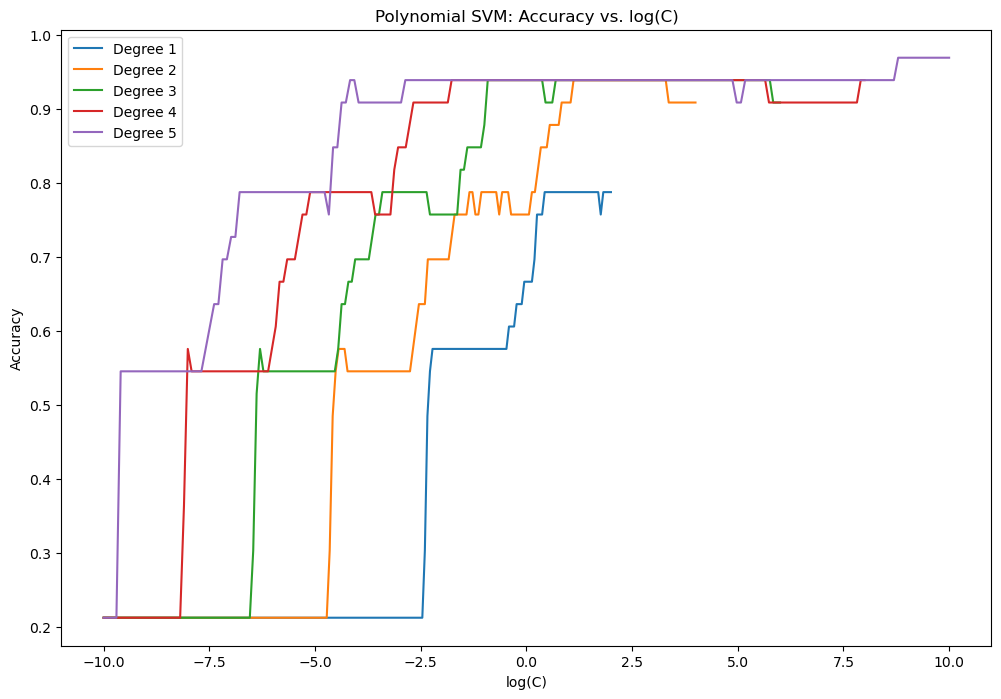

In [73]:
import math

plt.figure(figsize=(12, 8))

degrees = [1, 2, 3, 4, 5]
for degree in degrees:
    # Prepare a range of regularization constants
    C_values = [math.exp(i) for i in np.linspace(-10, 2*degree, 200)]
    accuracies = []

    for C in C_values:
        # Initialize and train the SVM with the polynomial kernel
        svm_poly = SVC(kernel='poly', degree=degree, C=C, random_state=1)
        svm_poly.fit(X_train_1, Y_train_1)

        # Make predictions on the validation set
        Y_pred_vali = svm_poly.predict(X_vali)

        # Calculate accuracy
        accuracy = accuracy_score(Y_vali, Y_pred_vali)
        accuracies.append(accuracy)

    # Plot Accuracy vs. log(C) for the current degree
    plt.plot(np.log(C_values), accuracies, label=f'Degree {degree}')

plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.title('Polynomial SVM: Accuracy vs. log(C)')
plt.legend()
plt.show()

#### d.  Choose the optimal degree and the optimal regularization constant C based on these graphs. Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected.

In [74]:
# Initialize and train the SVM with the optimal degree and C
optimal_svm = SVC(kernel='poly', degree=5, C=math.exp(10), random_state=1)
optimal_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = optimal_svm.predict(X_test)

In [75]:
# Calculate and report the out-of-sample accuracy
final_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Final Out-of-Sample Accuracy: {final_accuracy}")

Final Out-of-Sample Accuracy: 0.96


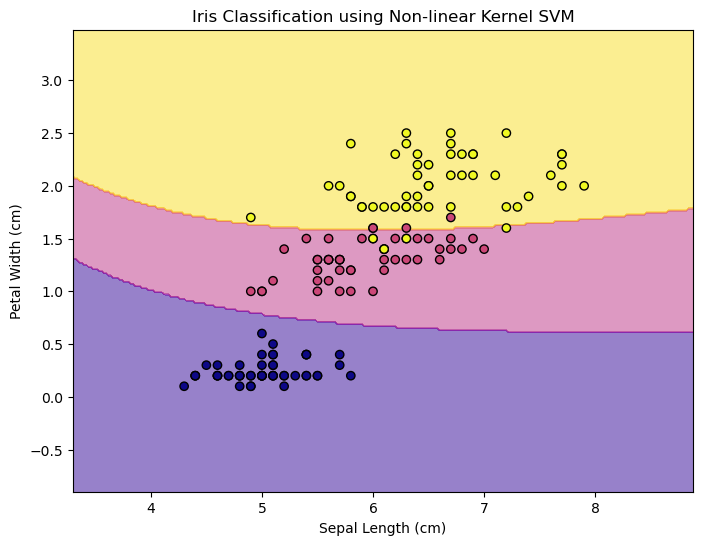

In [76]:
# Plot decision boundary for polynomial SVM using the function (example code below)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='plasma')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='plasma')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Classification using Non-linear Kernel SVM')
plt.show()

## Part C - Hierarchical and K-Means Clustering (30%)

For hierarchical and K-Means clustering, use the **Mall Customer Segmentation Data** from Kaggle. For leader clustering, simulate streaming data or use a large dataset divided into chunks to mimic streaming data, such as transaction data or sensor data streams.

In [77]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [78]:
# Start from selecting relevant features for clustering: 
# We will be working with two features: 'Annual Income (k$)' and 'Spending Score (1-100)'

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [79]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Task 1:  Implement K-Means algorithm (10%)

In [80]:
# Implement K-Means

from sklearn.cluster import KMeans
km = KMeans(random_state=999,n_clusters=5)
res=km.fit(X)

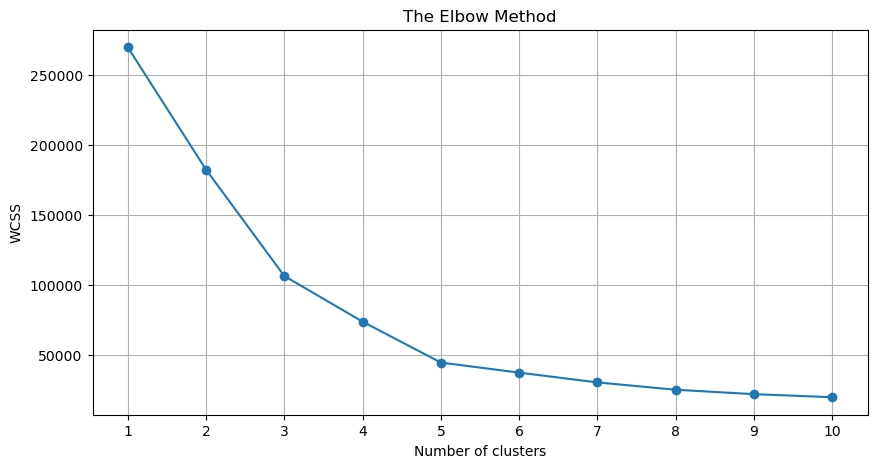

In [81]:
#reference: cited from chatgpt


# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=999, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'Elbow'
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [82]:
# According to Elbow method, chose 3

In [83]:
km = KMeans(random_state=999,n_clusters=3)
res=km.fit(X)

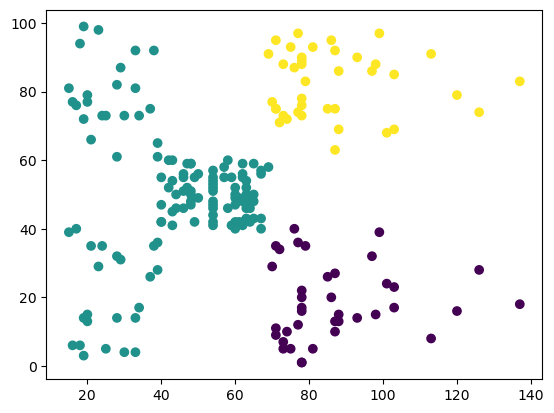

In [84]:
# Plotting clusters
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=res.labels_, cmap='viridis')

### Task 2:  Implement a Hierarchical Clustering algorithm (10%)

In [85]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

In [86]:
# For Hierarchical Clustering, you can perform Agglomerative Clustering

clustering = AgglomerativeClustering(n_clusters=3)
y_hc = clustering.fit_predict(X)

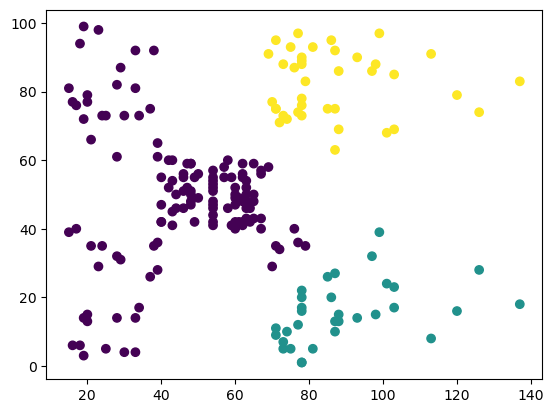

In [87]:
# Plot the clusters (for 2D data)

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=y_hc, cmap='viridis')

### Task 3: Evaluate and report clustering quality using silhouette scores (10%).

Silhouette score is a tool for assessing the appropriateness of clustering results by providing a quantitative measure of how well-defined and distinct the clusters are. The Silhouette Score quantifies how well a data point fits into its assigned cluster and how distinct it is from other clusters. 

In [88]:
from sklearn.metrics import silhouette_score

# For K-Means
# For K-Means
silhouette_avg = silhouette_score(X, res.labels_)
print("For K-means, the average silhouette_score is : {}".format(silhouette_avg))

# For Hierarchical Model
silhouette_avg = silhouette_score(X, y_hc)
print("For Hierarchical Model, the average silhouette_score is : {}".format(silhouette_avg))

For K-means, the average silhouette_score is : 0.46761358158775435
For Hierarchical Model, the average silhouette_score is : 0.4618340266628975


#### Discuss which method works the best for this dataset. Elaborate if those methods are good fit for this data.

In [89]:
#your answer here

Both methods have produced a moderate silhouette score, suggesting that the clusters neither have a clear-cut distinction nor are too ambiguous. In this case, both methods appear to be a relatively good fit for the data with similar performance.
Interpretability: Hierarchical clustering gives you a dendrogram which can be very informative and allows you to choose the level of clustering that is most meaningful. This is not something that K-Means directly offers.
Cluster Shapes: K-Means assumes spherical clusters and is best when clusters are distinct and well-separated. Hierarchical clustering doesn’t have this assumption and can sometimes capture more complex cluster shapes.Hence, hierarchical clustering is the most effective.